# In questo file andiamo a fare il task di clusterizzazione

In [3]:
# for basic mathematics operation 
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from yellowbrick.cluster import SilhouetteVisualizer

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "none"


# Adesso vado a caricare il dataset ma solo con le due colonne d'interesse

In [4]:
data = pd.read_csv('DataSet\out.csv')
#display(data.head())

# take only annual income and spending score
x = data.iloc[:, [0,8,9,13]].values

# let's check the shape of x
print(x.shape)


(2190888, 4)


# Devo fare ETL, devo eliminare i valore Nan nel dataset

In [5]:
import os
from scipy import stats
import math

# Cambio della cartella attuale nella cartella in cui si trova il file .py
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

path_cartella = r"\archive\csvs_per_year\csvs_per_year"

path = path_file + path_cartella

c:\Users\pc\Desktop\Università\Data science\Progetti\ProgettoPython\DataScience2Project


# Per comodità carico direttamente tutti i file

In [6]:
# Vado a caricare tutte le tabelle del mio dataset

madrid2008 = pd.read_csv(path+"\madrid_2008.csv")
madrid2009 = pd.read_csv(path+"\madrid_2009.csv")
madrid2010 = pd.read_csv(path+"\madrid_2010.csv")
madrid2011 = pd.read_csv(path+"\madrid_2011.csv")
madrid2012 = pd.read_csv(path+"\madrid_2012.csv")
madrid2013 = pd.read_csv(path+"\madrid_2013.csv")
madrid2014 = pd.read_csv(path+"\madrid_2014.csv")
madrid2015 = pd.read_csv(path+"\madrid_2015.csv")
madrid2016 = pd.read_csv(path+"\madrid_2016.csv")
madrid2017 = pd.read_csv(path+"\madrid_2017.csv")
madrid2018 = pd.read_csv(path+"\madrid_2018.csv")
station = pd.read_csv('DataSet\stations.csv')
out = pd.read_csv('DataSet\out.csv')
display(out.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190888 entries, 0 to 2190887
Data columns (total 14 columns):
 #   Column   Dtype  
---  ------   -----  
 0   date     object 
 1   BEN      float64
 2   CO       float64
 3   EBE      float64
 4   NMHC     float64
 5   NO       float64
 6   NO_2     float64
 7   O_3      float64
 8   PM10     float64
 9   PM25     float64
 10  SO_2     float64
 11  TCH      float64
 12  TOL      float64
 13  station  int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 234.0+ MB


None

# Per ogni anno e per ogni stazione calcolo la media troncata e la sostituisco ai valori Nan

In [7]:
full1 = pd.Series()
time=['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']
for d in time:
    full1Year = pd.Series()
    madrid = pd.read_csv(path+"\madrid_"+d+".csv")
    stazioni = madrid['station'].unique()
    #display(stazioni)
    for y in stazioni:
        onlyOne=madrid[madrid["station"].astype(str).str.contains(str(y))]
        copy = onlyOne.copy()
        newValue= stats.trim_mean(copy['NO_2'].dropna().values,0.05) # La faccio qui
        onlyOne = onlyOne['NO_2'].fillna(newValue) # Questo mette la media al posto dei nulli

        '''if(not math.isnan(newValue)):
             full1 = pd.concat([full1,onlyOne])'''
        if(True):
            full1Year = pd.concat([full1Year,onlyOne])
    if(full1Year.isna().sum() != 0):
        copy = full1Year.copy()
        newValue= stats.trim_mean(copy.dropna().values,0.05)
        full1Year = full1Year.fillna(newValue)
        full1 = pd.concat([full1,full1Year])
    else:
        full1 = pd.concat([full1,full1Year])

    #full1 = pd.concat([full1,full1Year])
    

df = full1.to_frame(name='NO_2')
display(df.isna().sum())
display(df.count())

display(df.head(10))

C:\Users\pc\AppData\Local\Temp\ipykernel_7896\676981790.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  full1 = pd.Series()
C:\Users\pc\AppData\Local\Temp\ipykernel_7896\676981790.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  full1Year = pd.Series()
C:\Users\pc\AppData\Local\Temp\ipykernel_7896\676981790.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  full1Year = pd.Series()
C:\Users\pc\AppData\Local\Temp\ipykernel_7896\676981790.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  full1Year = pd.Series()
C:\Users

NO_2    0
dtype: int64

NO_2    2190888
dtype: int64

,NO_2
0,83.089996
26,86.209999
52,82.279999
78,63.790001
104,59.349998
130,48.480000
156,43.310001
182,44.810001
208,36.599998
234,31.120001


# Lavoro sul secondo eleemento

In [15]:
full2 = pd.DataFrame()
time=['2008']#,'2009','2010','2011','2012','2013','2014','2015','2016','2017','2018'
for d in time:
    if(['2008','2009','2010'].__contains__(d)):
        a=6
        b=13
    if(['2011','2012','2013','2014','2015','2016'].__contains__(d)):
        a=6
        b=10
    if(['2017','2018'].__contains__(d)):
        a=7
        b=12
    full2Year = pd.DataFrame()
    madrid = pd.read_csv(path+"\madrid_"+d+".csv")
    stazioni = madrid['station'].unique()
    #display(stazioni)
    for y in stazioni:
        onlyOne=madrid[madrid["station"].astype(str).str.contains(str(y))].iloc[:,[a,b]]
        copy = onlyOne.copy()
        newValue1= stats.trim_mean(copy['SO_2'].dropna().values,0.05) # La faccio qui
        newValue2= stats.trim_mean(copy['NO_2'].dropna().values,0.05)
        onlyOne['SO_2'] = onlyOne['SO_2'].fillna(newValue1) # Questo mette la media al posto dei nulli
        onlyOne['NO_2'] = onlyOne['NO_2'].fillna(newValue2) # Questo mette la media al posto dei nulli

        '''if(not math.isnan(newValue)):
            full2 = pd.concat([full2,onlyOne])'''
        if(onlyOne['NO_2'].isna().sum() == 0 and onlyOne['SO_2'].isna().sum() == 0):
            full2Year = pd.concat([full2Year,onlyOne])
            
    '''if(full2Year.isna().sum() != 0):
        copy = full2Year.copy()
        newValue= stats.trim_mean(copy.dropna().values,0.05)
        full2Year = full2Year.fillna(newValue)
        full2 = pd.concat([full2,full2Year])
    else:
        full2 = pd.concat([full2,full2Year])'''

    full2 = pd.concat([full2,full2Year],ignore_index=True)
    

#df2 = full2.to_frame(name='SO_2')
display(full2.isna().sum())
display(full2.count())

display(full2.head(10))

NO_2    0
SO_2    0
dtype: int64

NO_2    226392
SO_2    226392
dtype: int64

,NO_2,SO_2
0,83.089996,8.98
1,86.209999,10.12
2,82.279999,9.79
3,63.790001,8.26
4,59.349998,8.94
5,48.480000,8.47
6,43.310001,8.20
7,44.810001,8.45
8,36.599998,8.28
9,31.120001,7.88


# Qui vado a fare le operazioni per calcolare il K migliore

In [16]:
distortions = []
#x = pd.DataFrame(data={'NO_2':df['NO_2'],'SO_2':df2['SO_2']})
clustering1 = full2.iloc[:,[0,1]].values

for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(clustering1)
    distortions.append(km.inertia_)

# Stampo il grafico

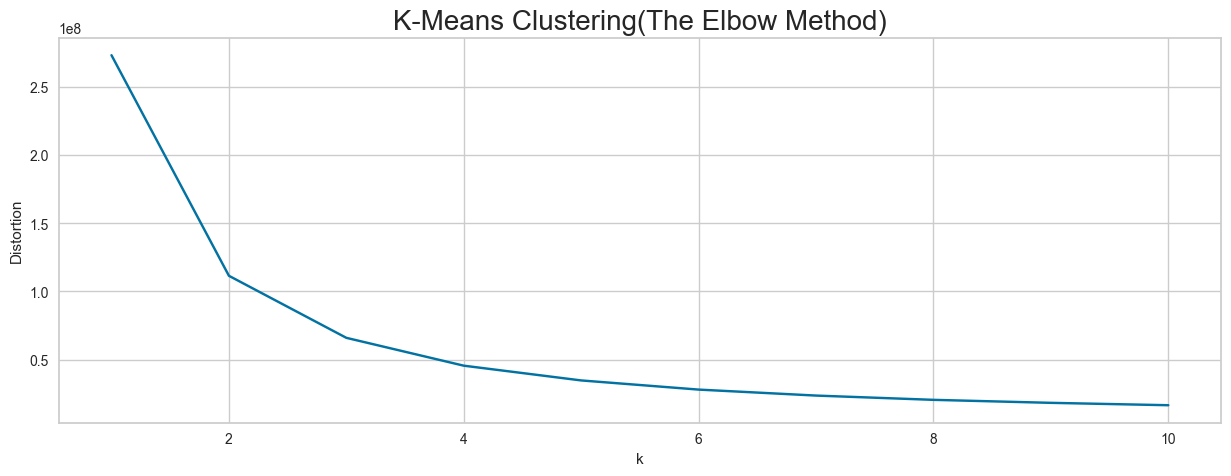

In [17]:
plt.figure(figsize=(15,5))
plt.plot(range(1, 11), distortions)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.show()

# Prova di clustering

(50000, 2)


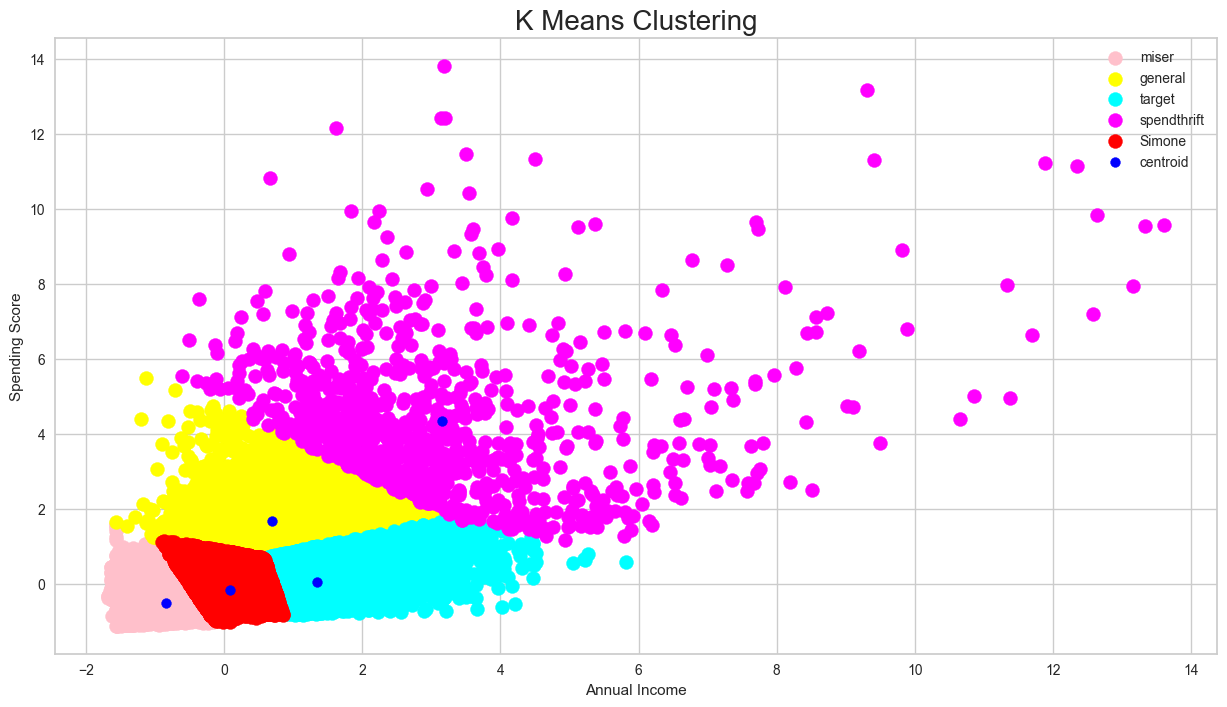

In [27]:
#x = pd.DataFrame(data={'PM10':df['PM10'],'PM25':df2['PM25']}) #doppione
clustering1 = full2.iloc[0:50000,[0,1]].values
scaler = StandardScaler()
scaler.fit(clustering1)
StandardScaler()
clustering1 = scaler.transform(clustering1)

print(clustering1.shape)
from sklearn.cluster import KMeans

'''wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(clustering1)
    wcss.append(km.inertia_)'''

#plt.figure(figsize=(20,8))
#plt.plot(range(1, 11), wcss)
#plt.title('The Elbow Method', fontsize = 20)
#plt.xlabel('No. of Clusters')
#plt.ylabel('wcss')
#plt.show()

km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(clustering1)

plt.figure(figsize=(15,8))
plt.scatter(clustering1[y_means == 0, 0], clustering1[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(clustering1[y_means == 1, 0], clustering1[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(clustering1[y_means == 2, 0], clustering1[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(clustering1[y_means == 3, 0], clustering1[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(clustering1[y_means == 4, 0], clustering1[y_means == 4, 1], s = 100, c = 'red', label = 'Simone') # Aggiunto
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

# Clustering troncato

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190888 entries, 0 to 2190887
Data columns (total 14 columns):
 #   Column   Dtype         
---  ------   -----         
 0   date     datetime64[ns]
 1   BEN      float64       
 2   CO       float64       
 3   EBE      float64       
 4   NMHC     float64       
 5   NO       float64       
 6   NO_2     float64       
 7   O_3      float64       
 8   PM10     float64       
 9   PM25     float64       
 10  SO_2     float64       
 11  TCH      float64       
 12  TOL      float64       
 13  station  int64         
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usage: 234.0 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1166156 entries, 0 to 2190884
Data columns (total 14 columns):
 #   Column   Non-Null Count    Dtype         
---  ------   --------------    -----         
 0   date     1166156 non-null  datetime64[ns]
 1   BEN      415872 non-null   float64       
 2   CO       910060 non-null   float64       
 3 

None

(1166156, 2)


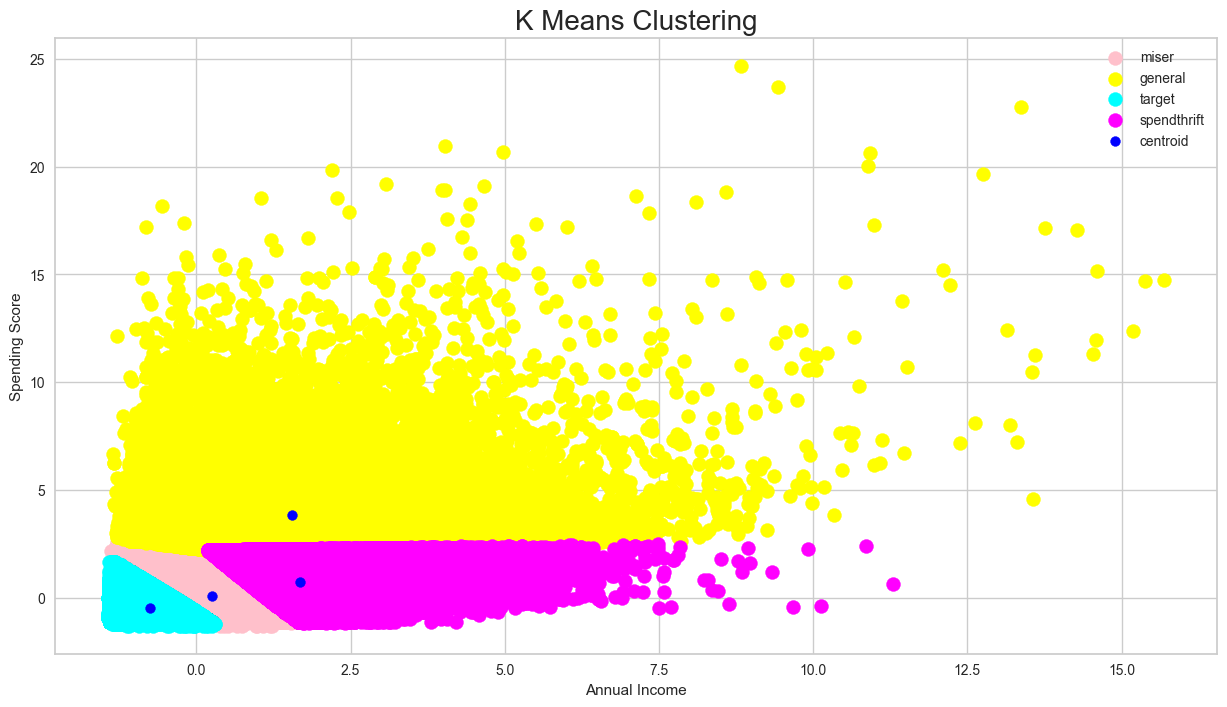

In [22]:

dataset = pd.read_csv("DataSet\out.csv")
dataset['date'] = pd.to_datetime(dataset['date'])
dataset.set_index('date')

#NO_2,PM10
#
dataset.info()
pre_clustering1 = dataset.loc[(dataset['NO_2'].notnull()) & (dataset['SO_2'].notnull())]
display(pre_clustering1.info())
clusteringLeo = pre_clustering1.iloc[:,[6,10]].values
scaler = StandardScaler()
scaler.fit(clusteringLeo)
StandardScaler()
clusteringLeo = scaler.transform(clusteringLeo)

print(clusteringLeo.shape)
from sklearn.cluster import KMeans

'''wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(clusteringLeo)
    wcss.append(km.inertia_)'''

#plt.figure(figsize=(20,8))
#plt.plot(range(1, 11), wcss)
#plt.title('The Elbow Method', fontsize = 20)
#plt.xlabel('No. of Clusters')
#plt.ylabel('wcss')
#plt.show()

km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(clusteringLeo)

plt.figure(figsize=(15,8))
plt.scatter(clusteringLeo[y_means == 0, 0], clusteringLeo[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(clusteringLeo[y_means == 1, 0], clusteringLeo[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(clusteringLeo[y_means == 2, 0], clusteringLeo[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(clusteringLeo[y_means == 3, 0], clusteringLeo[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

#pmAverageStation = datasetStation28079055['PM10'].resample('10d').mean()
#pmAverageStation.plot.line(x='date',y='PM25')
#plt.show()
#pmAverage = dataset['PM25'].resample('5d')
#pmAverage.plot.line(x='date',y='PM25')
#print(pmAverage)
#dataset.plot.line(x='date',y='PM25')
#plt.show()



# Lancio del clustering gerachico

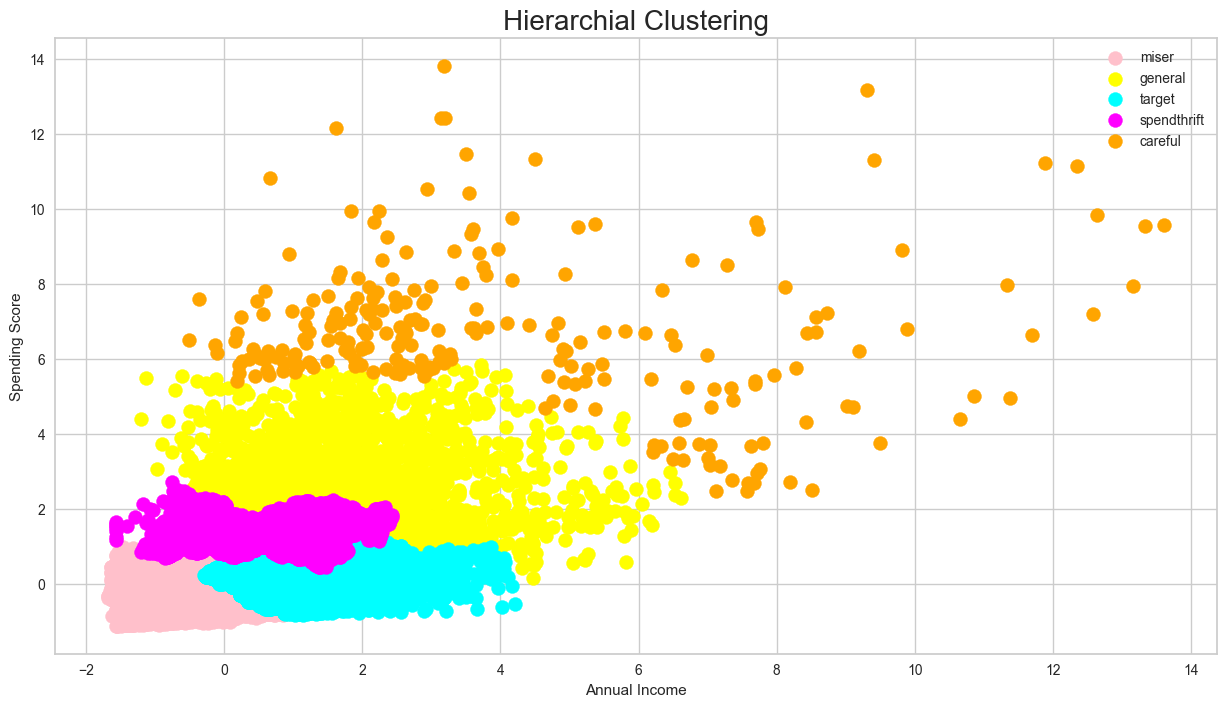

In [28]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(clustering1)

plt.figure(figsize=(15,8))
plt.scatter(clustering1[y_hc == 0, 0], clustering1[y_hc == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(clustering1[y_hc == 1, 0], clustering1[y_hc == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(clustering1[y_hc == 2, 0], clustering1[y_hc == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(clustering1[y_hc == 3, 0], clustering1[y_hc == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(clustering1[y_hc == 4, 0], clustering1[y_hc == 4, 1], s = 100, c = 'orange', label = 'careful')

plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

Test